In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Monte Carlo Basics

### 1. Introduction

The term **Monte Carlo (MC) methods** refers to a broad collection of tools that are useful for approximating quantities based on artificially generated random samples. These methods include:

- **Monte Carlo integration**: Estimating an integral using random samples.
- **Inversion technique**: Generating the required random samples.
- **Markov Chain Monte Carlo methods**: An advanced topic discussed in Chapter 6.

In principle, the approximation can be made as good as required simply by increasing the Monte Carlo sample size. As we will see, Monte Carlo methods are a very useful tool in **Bayesian inference**.

To illustrate the basic idea of Monte Carlo methods, consider **Buffon’s needle problem**, where a needle of length $ l = 10 \, \text{cm} $ is dropped randomly onto a floor with parallel lines spaced $ d = 10 \, \text{cm} $ apart. The goal is to find $ p $, the probability of the needle crossing a line.

The exact value of $ p $ can be derived analytically as:

$$
p = \frac{2}{\pi} \approx 0.63662
$$

However, obtaining this analytical solution can be complex. If this analytical solution is impractical, we can estimate $ p $ using Monte Carlo methods.

### Monte Carlo Estimation

The simplest way to estimate $ p $ is to drop the needle randomly onto the floor $ N = 1000 $ times. If the needle crosses a line $ C = 641 $ times, then the Monte Carlo estimate of $ p $ is given by:

$$
\hat{p} = \frac{C}{N} = \frac{641}{1000} = 0.641
$$

Instead of conducting a physical experiment, we can also simulate this process virtually by generating random drops on a computer. This approach is typically faster and more accurate. We will detail the parameters of each drop and determine the configuration that results in the needle crossing a line.

In this chapter, we will first discuss Monte Carlo methods and their usefulness under the assumption that we have access to, or can generate, the required random samples. As seen in the exercises and their solutions, such samples can often be easily obtained using built-in R functions, such as `runif()` and `rnorm()`.

Following this, we will describe special methods for generating random samples, starting with the simplest techniques, including the inversion technique and rejection sampling. More complicated techniques that involve Markov chain theory will be reserved for later chapters.

The structure of this chapter will first focus on Monte Carlo methods and random number generation in a general setting. Only after we have covered these two topics to a sufficient level will we discuss their applications in Bayesian inference. This format aims to minimize confusion.


## 2 The Method of Monte Carlo Integration for Estimating Means

One of the most important applications of Monte Carlo methods is the estimation of means. Suppose we are interested in $ \mu $, the mean of some distribution defined by a density $ f(x) $ (or by a cumulative distribution function $ F(x) $), but we are unable to calculate $ \mu $ exactly (or easily). For example, this can be represented by the formula:

$$
\mu = \mathbb{E}[x] = \int x f(x) \, dx \quad \text{or} \quad \mu = \mathbb{E}[x] = \sum x f(x) \quad \text{or} \quad \mu = \mathbb{E}[x] = \int x \, dF(x).
$$

Also, suppose we are able to generate (or obtain) a random sample from the distribution in question. Denote this sample as $ x_1, \ldots, x_J \sim \text{i.i.d. } f(x) $ (or $ x_1, \ldots, x_J \sim \text{i.i.d. } F(x) $). Then we may use this sample to estimate $ \mu $ by:

$$
\bar{x} = \frac{1}{J} \sum_{j=1}^{J} x_j.
$$

Additionally, a \( 1 - \alpha \) confidence interval (CI) for \( \mu \) is given by:

$$
\text{CI} = \left( \bar{x} \pm z_{\alpha/2} \frac{s}{\sqrt{J}} \right),
$$

where

$$
s^2 = \frac{1}{J-1} \sum_{j=1}^{J} (x_j - \bar{x})^2
$$

is the sample variance of the random values. 

In this context, we refer to:

- $ x_1, \ldots, x_J $: Monte Carlo sample values or the Monte Carlo sample
- $ \bar{x} $: Monte Carlo sample mean or the Monte Carlo estimate
- CI: Monte Carlo $ 1 - \alpha $ confidence interval for $ \mu $
- $ J $: Monte Carlo sample size
- $ s^2 $: Monte Carlo sample variance
- $ s $: Monte Carlo sample standard deviation
- $ \frac{s}{\sqrt{J}} $: Monte Carlo standard error (SE)

Three important facts here are that:

- $ \bar{x} $ is unbiased for $ \mu $ (i.e. $ \mathbb{E}[\bar{x}] = \mu $)
- The CI has coverage approximately $ 1 - \alpha $, by the Central Limit Theorem
- The width of the CI converges to zero as the Monte Carlo sample size $ J $ tends to infinity.


Also, a \( 1 - \alpha \) confidence interval (CI) for \( \mu \) is given by:

$$
\text{CI} = \left( \bar{x} \pm z_{\alpha/2} \frac{s}{\sqrt{J}} \right),
$$

where 

$$
s^2 = \frac{1}{J-1} \sum_{j=1}^{J} (x_j - \bar{x})^2
$$ 

is the sample variance of the random values.

In this context, we refer to:

- $ x_1, \ldots, x_J $: Monte Carlo sample values or the Monte Carlo sample
- $ \bar{x} $: Monte Carlo sample mean or the Monte Carlo estimate
- CI: Monte Carlo $ 1 - \alpha $ confidence interval for $ \mu $
- $ J $: Monte Carlo sample size
- $ s^2 $: Monte Carlo sample variance
- $ s $: Monte Carlo sample standard deviation
- $ \frac{s}{\sqrt{J}} $: Monte Carlo standard error (SE)

Three important facts here are that:

- $ \bar{x} $ is unbiased for $ \mu $ (i.e. $ \mathbb{E}[\bar{x}] = \mu $)
- The CI has coverage approximately $ 1 - \alpha $, by the Central Limit Theorem
- The width of the CI converges to zero as the Monte Carlo sample size $ J $ tends to infinity.

## Exercise.1: Monte Carlo Estimation of a Known Gamma Mean

(a) Use the R function `rgamma()` to generate a random sample of size $ J = 100 $ from the $ \text{Gamma}(3,2) $ distribution, whose mean is $ \mu = \frac{3}{2} = 1.5 $. Then use the method of Monte Carlo to produce a point estimate $ \mu $ and a 95% CI for $ \mu $.

(b) Repeat (a) but with Monte Carlo sample sizes of $ 1,000 $ and $ 10,000 $, and discuss the results.

### Bayesian Methods for Statistical Analysis

Note: In this exercise, we are focusing on the integral 

$$
\mu = \int_0^\infty x f(x) \, dx = \int_0^\infty x \frac{2^3}{\Gamma(3)} x^{3-1} e^{-2x} \, dx,
$$

showing how it could be estimated via Monte Carlo if it were not possible to evaluate analytically. The same approach could be applied if the integral were impossible to evaluate.

## Solution to Exercise.1

(a) Applying the above procedure, we estimate $ \mu $ by $ \bar{x} = 1.5170 $. The Monte Carlo 95% confidence interval for $ \mu $ is 

$$
\text{CI} = \left( \bar{x} \pm z_{0.025} \frac{s}{\sqrt{J}} \right) = (1.3539, 1.6800).
$$ 

We note that $ \bar{x} $ is ‘close’ to the true value, $ \mu = 1.5 $, and the CI contains that true value.

(b) Repeating (a) with $ J = 1,000 $ we obtain the point estimate $ 1.5199 $ and the interval estimate $ (1.4658, 1.5740) $. Repeating (a) with $ J = 10,000 $ we obtain the point estimate $ 1.4942 $ and the interval estimate $ (1.4773, 1.5110) $. As in (a), we note in each case that $ \bar{x} $ is ‘close’ to $ \mu $, and the CI contains $ \mu $. We also observe that as $ J $ increases, the Monte Carlo point estimate tends to get closer to $ \mu $, and the 95% CI tends to get narrower. (The widths of the three CIs are $ 0.3261, 0.1081 $, and $ 0.0337 $.)


In [1]:
import random
import math

# Function to generate gamma-distributed random variables
def gamma_random(shape, scale):
    # Using the method of generating a gamma random variable
    # by summing exponential random variables
    return sum(-math.log(random.random()) for _ in range(shape)) * scale

# Function to estimate the mean and confidence interval using Monte Carlo methods
def monte_carlo_gamma_estimation(sample_size):
    # Parameters for the Gamma distribution
    shape = 3
    scale = 0.5  # scale = 1/rate, where rate = 2
    
    # Generate random samples from the Gamma distribution
    samples = [gamma_random(shape, scale) for _ in range(sample_size)]
    
    # Calculate the Monte Carlo estimate of the mean
    x_bar = sum(samples) / sample_size
    
    # Calculate the sample variance
    s_squared = sum((x - x_bar) ** 2 for x in samples) / (sample_size - 1)
    
    # Calculate the standard error
    standard_error = math.sqrt(s_squared / sample_size)
    
    # Calculate the z-value for a 95% confidence interval
    z_alpha_over_2 = 1.96  # For a 95% CI
    
    # Calculate the confidence interval
    confidence_interval = (
        x_bar - z_alpha_over_2 * standard_error,
        x_bar + z_alpha_over_2 * standard_error
    )
    
    return x_bar, confidence_interval

# Sample sizes to evaluate
sample_sizes = [100, 1000, 10000]

# Run the estimation for each sample size
for size in sample_sizes:
    mean_estimate, ci = monte_carlo_gamma_estimation(size)
    print(f"Sample Size: {size}")
    print(f"Monte Carlo Estimate of Mean: {mean_estimate:.4f}")
    print(f"95% Confidence Interval: ({ci[0]:.4f}, {ci[1]:.4f})\n")


Sample Size: 100
Monte Carlo Estimate of Mean: 1.5271
95% Confidence Interval: (1.3610, 1.6932)

Sample Size: 1000
Monte Carlo Estimate of Mean: 1.4784
95% Confidence Interval: (1.4251, 1.5316)

Sample Size: 10000
Monte Carlo Estimate of Mean: 1.5044
95% Confidence Interval: (1.4873, 1.5214)



## 3. Other uses of the MC sample

Once a Monte Carlo sample $x_1, \ldots, x_J \sim \text{iid } f(x)$ has been obtained, it can be used for much more than just estimating the mean of the distribution, $\mu = \mathbb{E}[x]$. For example, suppose we are interested in the (lower) $p$-quantile of the distribution, namely 

$$
q_p = F^{-1}(p) = \{ \text{value of } x \text{ such that } F(x) = p \}.
$$

The MC estimate of $q_p$ is simply $\hat{q}_p$, the empirical $p$-quantile of $x_1, \ldots, x_J$. For instance, the median \(q_{1/2}\) can be estimated by the middle number amongst $x_1, \ldots, x_J$ after sorting in increasing order. This assumes that $J$ is odd. If $J$ is even, we estimate $q_{1/2}$ by the average of the two middle numbers. Thus we may write the MC estimate of $q_{1/2}$ as 

$$
\hat{q}_{1/2} = 
\begin{cases} 
x_{(J+1)/2}, & J \text{ odd} \\ 
\frac{x_{(J/2)} + x_{(J+1)/2}}{2}, & J \text{ even} 
\end{cases}
$$

where $x_{(k)}$ is the \(k\)th smallest value amongst $x_1, \ldots, x_J$ $(k = 1, \ldots, J)$.

Also, we estimate the $1 - \alpha$ central density region (CDR) for $x$, namely 

$$
(q_{\alpha/2}, q_{1-\alpha/2}) \text{ by } (\hat{q}_{\alpha/2}, \hat{q}_{1-\alpha/2}).
$$

Further, suppose we are interested in the expected value of some function of $x$, say $y = g(x)$. That is, we wish to estimate the quantity/integral 

$$
\psi = \mathbb{E}[y] = \int y f(y) dy = \mathbb{E}[g(x)] = \int g(x) f(x) dx.
$$

Then we simply calculate 

$$
y_j = g(x_j) \text{ for each } j = 1, \ldots, J.
$$

The result will be a random sample $y_1, \ldots, y_J \sim \text{iid } f(y)$ to which the method of Monte Carlo can then be applied in the usual way. Thus, an estimate of $\psi$ is 

$$
\hat{\psi} = \frac{1}{J} \sum_{j=1}^{J} y_j,
$$

and a \(1 - \alpha\) CI for \(\psi\) is 

$$
\left( \hat{y} \pm z_{\alpha/2} \frac{s_y}{\sqrt{J}} \right),
$$

where 

$$
s_y^2 = \frac{1}{J-1} \sum_{j=1}^{J} (y_j - \hat{y})^2 \text{ (the sample variance of the } y\text{-values)}.
$$

This idea applies to even very complicated functions $y = g(x)$ for which the exact or even approximate value of $\psi = \mathbb{E}[y]$ would otherwise be very difficult to obtain, either analytically or numerically using a deterministic technique such as numerical integration (or quadrature).

Also, the density $f(x)$ can be estimated by smoothing a probability histogram of $x_1, \ldots, x_J$. Likewise, the density $f(y)$ can be estimated by smoothing a probability histogram of $y_1, \ldots, y_J$. (This could be extremely useful if $y$ is a very complicated function of $x$.)

**Note 1:** As we will see later, it is often the case that we are able to sample from a distribution without knowing—or being able to derive—the exact form of its density function.

**Note 2:** Smoothing a histogram requires some arbitrary decisions to be made about the degree of smoothing and other smoothing parameters. So the MC estimate of a density is not uniquely defined.


In [2]:
import random
import math

# Function to generate a random sample from Gamma distribution
def gamma_sample(shape, scale, size):
    samples = []
    for _ in range(size):
        # Generate a sample from Gamma using the sum of exponential random variables
        sample = sum(random.expovariate(1 / scale) for _ in range(shape))
        samples.append(sample)
    return samples

# Function to calculate the mean of the sample
def sample_mean(samples):
    return sum(samples) / len(samples)

# Function to calculate the sample variance
def sample_variance(samples, mean):
    return sum((x - mean) ** 2 for x in samples) / (len(samples) - 1)

# Function to calculate confidence interval
def confidence_interval(mean, variance, size, alpha=0.05):
    z_alpha = 1.96  # for 95% CI
    standard_error = math.sqrt(variance / size)
    return (mean - z_alpha * standard_error, mean + z_alpha * standard_error)

# Function to calculate quantiles
def quantile(samples, q):
    sorted_samples = sorted(samples)
    index = int(q * len(sorted_samples))
    if index < len(sorted_samples):
        return sorted_samples[index]
    return sorted_samples[-1]

# Main simulation function
def monte_carlo_simulation():
    J = [100, 1000, 10000]  # Different sample sizes
    shape, scale = 3, 2  # Parameters for the Gamma distribution
    true_mean = shape / scale  # True mean for Gamma(3, 2) is 3/2 = 1.5

    for size in J:
        # Generate random samples from Gamma distribution
        samples = gamma_sample(shape, scale, size)
        
        # Calculate mean and variance
        mean = sample_mean(samples)
        variance = sample_variance(samples, mean)

        # Calculate confidence interval
        ci = confidence_interval(mean, variance, size)

        # Calculate median (q_1/2) as an example of a quantile
        median = quantile(samples, 0.5)

        print(f"Sample Size: {size}")
        print(f"Monte Carlo Estimate of Mean: {mean:.4f}")
        print(f"95% Confidence Interval for Mean: {ci}")
        print(f"Estimated Median (q_1/2): {median:.4f}")
        print(f"True Mean: {true_mean:.4f}\n")

# Run the Monte Carlo simulation
monte_carlo_simulation()


Sample Size: 100
Monte Carlo Estimate of Mean: 6.1303
95% Confidence Interval for Mean: (5.310548595668639, 6.95007422457369)
Estimated Median (q_1/2): 4.9566
True Mean: 1.5000

Sample Size: 1000
Monte Carlo Estimate of Mean: 6.0614
95% Confidence Interval for Mean: (5.843507966487981, 6.2793611857619736)
Estimated Median (q_1/2): 5.5259
True Mean: 1.5000

Sample Size: 10000
Monte Carlo Estimate of Mean: 6.0119
95% Confidence Interval for Mean: (5.944007275507129, 6.0797894823221945)
Estimated Median (q_1/2): 5.3753
True Mean: 1.5000



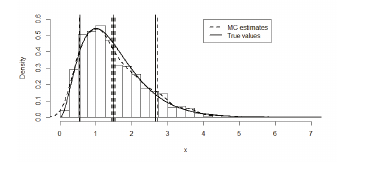
Figure.1 Histogram of x-value (J = 1,000)

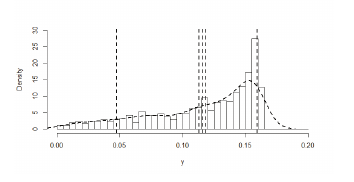
Figure.2 Histogram of y-value (J = 1,000)


## Exercise.2: Monte Carlo Estimation of Complicated Quantities

Suppose that $ x \sim \text{Gamma}(3, 2) $. Use Monte Carlo methods and a sample of size $ J = 1,000 $ to estimate:

- $ \mu = \mathbb{E}[x] $
- The 80% Central Density Region (CDR) for $ x $
- $ \psi = \mathbb{E}[y] $ where $ y = \frac{x^2 e^{-x}}{1 + x} $
- The 80% Central Density Region (CDR) for $ y $

Present your results graphically, and wherever possible, show the true values of the quantities being estimated. Then repeat everything using a Monte Carlo sample size of $ J = 10,000 $.

## Solution to Exercise .2

The required graphs are shown in Figures .1 to .4. Below, we detail the steps taken to estimate the required quantities:

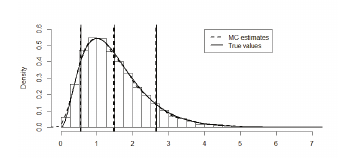

Figure.3 Histogram of x-value (J = 10,000)

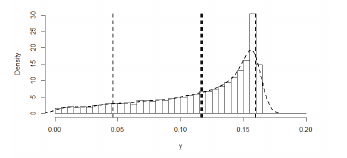

Figure.4 Histogram of y-value (J = 10,000)

### Step 1: Generating Random Samples
Generate a random sample from the Gamma distribution with parameters 3 and 2. 

### Step 2: Estimating Mean $ \mu $
Calculate the mean of the generated samples.

### Step 3: Estimating the 80% CDR for $ x $
Determine the empirical quantiles to estimate the 80% CDR for the random variable $ x $.

### Step 4: Calculating $ y $
Calculate the values of $ y $ using the generated values of $ x $.

### Step 5: Estimating $ \psi $
Estimate $ \psi = \mathbb{E}[y] $ by calculating the mean of the values of $ y $.

### Step 6: Estimating the 80% CDR for $ y $
Determine the empirical quantiles to estimate the 80% CDR for the random variable $ y $.

### Step 7: Visualization
Graphically present the results and indicate the true values of the estimated quantities.

### Figures
The results will be graphically represented in Figures 5.1 to 5.4. Ensure that the figures clearly indicate the estimated values along with the true values for comparison.

Repeat the simulation with $ J = 10,000 $ to observe how the estimates improve with larger sample sizes.


Sample Size (J): 1000
Estimated Mean (µ): 5.933212672291202
80% CDR for x: (2.166439574216369, 10.435606405714287)
Estimated Ey (ψ): 0.052649553287677835
80% CDR for y: (0.0002796725902746455, 0.16200543483936003)


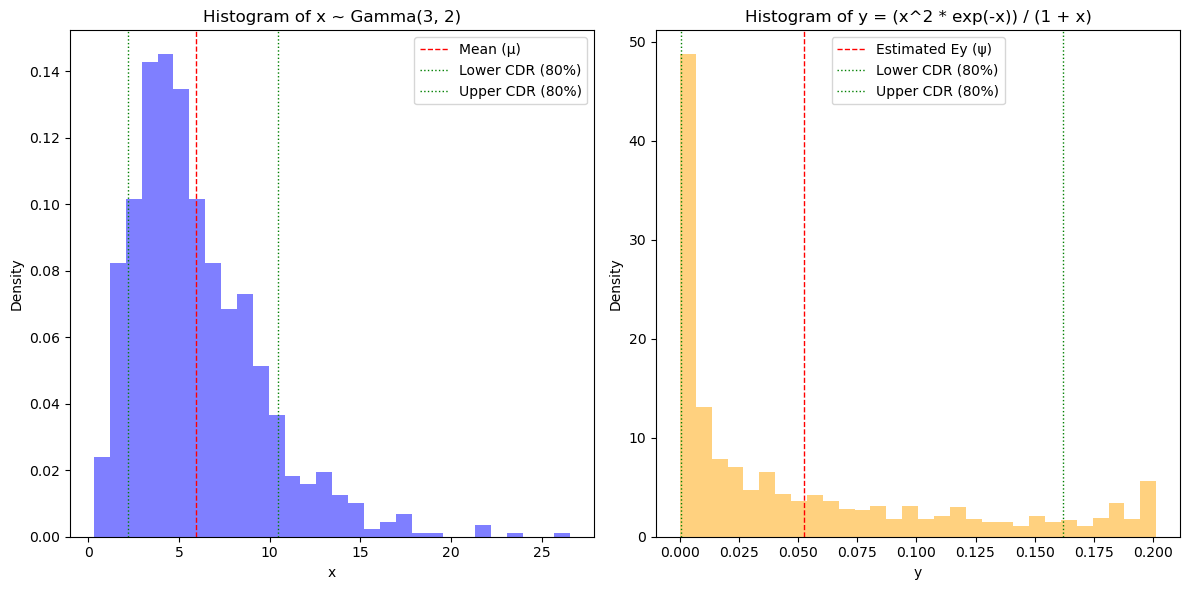

Sample Size (J): 10000
Estimated Mean (µ): 6.020098298800528
80% CDR for x: (2.2326798295208206, 10.676588427975487)
Estimated Ey (ψ): 0.05091927359054699
80% CDR for y: (0.0002253022819174752, 0.1609335978427562)


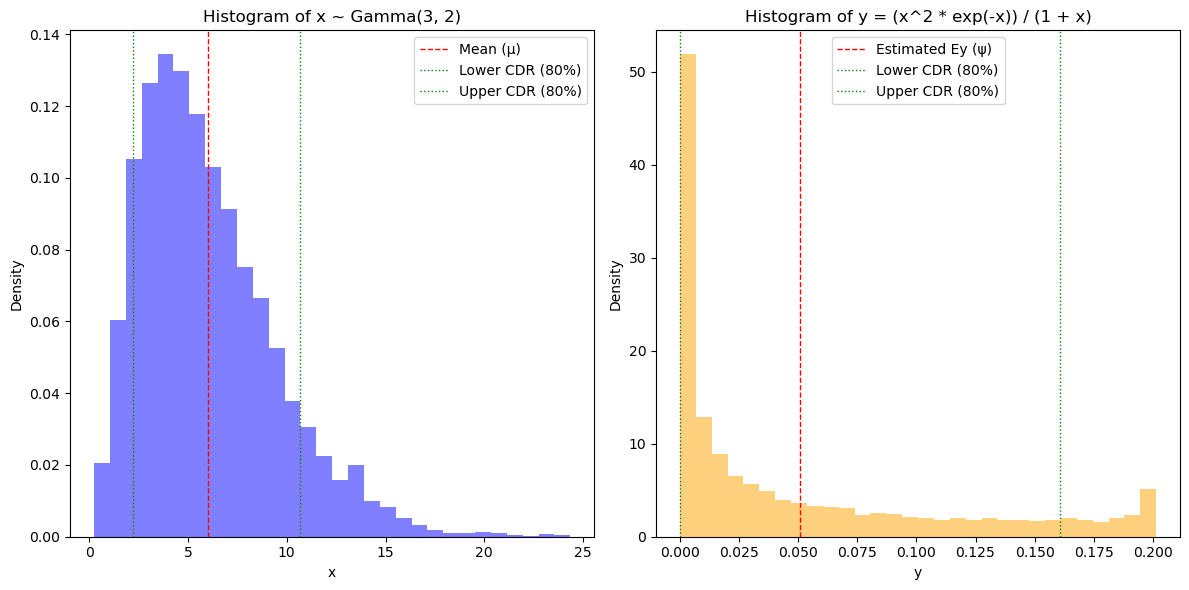

In [3]:
import random
import math
import matplotlib.pyplot as plt

# Function to generate random samples from Gamma(3, 2)
def gamma_sample(shape, scale, size):
    samples = []
    for _ in range(size):
        sample = 0
        for _ in range(shape):
            sample += random.expovariate(1.0 / scale)  # Exponential sampling
        samples.append(sample)
    return samples

# Function to calculate the empirical quantiles
def empirical_quantiles(data, alpha):
    data.sort()
    index = int(alpha * len(data))
    return data[index], data[-index - 1]

# Function to calculate the expected value of y
def expected_value_y(samples):
    return sum((x**2 * math.exp(-x)) / (1 + x) for x in samples) / len(samples)

# Main function to perform the Monte Carlo estimation
def monte_carlo_estimation(J):
    # Step 1: Generate random samples
    samples_x = gamma_sample(3, 2, J)
    
    # Step 2: Estimate mean µ
    mu = sum(samples_x) / J
    
    # Step 3: Estimate the 80% CDR for x
    lower_cdr_x, upper_cdr_x = empirical_quantiles(samples_x, 0.1)
    
    # Step 4: Calculate y values
    samples_y = [(x**2 * math.exp(-x)) / (1 + x) for x in samples_x]
    
    # Step 5: Estimate ψ = Ey
    psi = sum(samples_y) / J
    
    # Step 6: Estimate the 80% CDR for y
    lower_cdr_y, upper_cdr_y = empirical_quantiles(samples_y, 0.1)

    # Step 7: Print results
    print(f"Sample Size (J): {J}")
    print(f"Estimated Mean (µ): {mu}")
    print(f"80% CDR for x: ({lower_cdr_x}, {upper_cdr_x})")
    print(f"Estimated Ey (ψ): {psi}")
    print(f"80% CDR for y: ({lower_cdr_y}, {upper_cdr_y})")
    
    # Step 8: Plot histograms
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(samples_x, bins=30, density=True, alpha=0.5, color='blue')
    plt.axvline(mu, color='red', linestyle='dashed', linewidth=1, label='Mean (µ)')
    plt.axvline(lower_cdr_x, color='green', linestyle='dotted', linewidth=1, label='Lower CDR (80%)')
    plt.axvline(upper_cdr_x, color='green', linestyle='dotted', linewidth=1, label='Upper CDR (80%)')
    plt.title('Histogram of x ~ Gamma(3, 2)')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(samples_y, bins=30, density=True, alpha=0.5, color='orange')
    plt.axvline(psi, color='red', linestyle='dashed', linewidth=1, label='Estimated Ey (ψ)')
    plt.axvline(lower_cdr_y, color='green', linestyle='dotted', linewidth=1, label='Lower CDR (80%)')
    plt.axvline(upper_cdr_y, color='green', linestyle='dotted', linewidth=1, label='Upper CDR (80%)')
    plt.title('Histogram of y = (x^2 * exp(-x)) / (1 + x)')
    plt.xlabel('y')
    plt.ylabel('Density')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Run the Monte Carlo estimation with sample sizes of 1,000 and 10,000
monte_carlo_estimation(1000)
monte_carlo_estimation(10000)


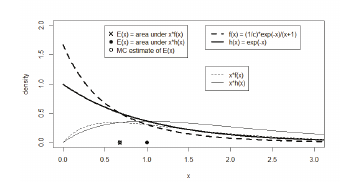 

Figure.5 Illustration of importance sampling

# 5.4 Importance Sampling

When applying the method of Monte Carlo to estimate an integral of the form 

$$
\psi = E[g(x)] = \int g(x) f(x) dx,
$$ 

suppose it is impossible (or difficult) to sample from \( f(x) \), but it is easy to sample from a distribution/density \( h(x) \) which is ‘similar’ to \( f(x) \). Then we may write

$$
\psi = \int \frac{f(x)}{h(x)} g(x) h(x) dx = \int w(x) h(x) dx,
$$ 

where 

$$
w(x) = \frac{g(x) f(x)}{h(x)}.
$$ 

This suggests that we sample $ x_1, \ldots, x_J \sim \text{iid } h(x) $ and use Monte Carlo to estimate $ \psi $ by 

$$
\hat{\psi} = \frac{1}{J} \sum_{j=1}^{J} w_j = \frac{1}{J} \sum_{j=1}^{J} \frac{g(x_j) f(x_j)}{h(x_j)}.
$$ 

This technique is called importance sampling, and there are several issues to consider. As already indicated, the method works best if $ h(x) $ is chosen to be very similar to $ f(x) $. Another issue is that $ f(x) $ may be known only up to a multiplicative constant, i.e. where 

$$
f(x) = \frac{k(x)}{c}, 
$$ 

where the kernel $ k(x) $ is known exactly but it is too difficult or impossible to evaluate the normalizing constant $ c = \int k(x) dx $. In that case, we may write 

$$
\psi = \int g(x) k(x) dx = \frac{\int g(x) k(x) dx}{c} \int k(x) dx.
$$ 

Then we have:

$$
\psi = \frac{\int \frac{k(x)}{h(x)} g(x) h(x) dx}{\int k(x) dx} = \frac{\int w(x) h(x) dx}{\int u(x) h(x) dx},
$$ 

where:

$$
w(x) = \frac{g(x) k(x)}{h(x)},
$$ 
$$
u(x) = \frac{k(x)}{h(x)}.
$$ 

This suggests that we sample $ x_1, \ldots, x_J \sim \text{iid } h(x) $ (as before) and apply MC estimation to the means of $ w(x) $ and $ u(x) $, respectively (each with respect to the distribution defined by density $ h(x) $) so as to obtain the estimates:

$$
\hat{\psi} = \frac{1}{J} \sum_{j=1}^{J} w_j + \frac{1}{J} \sum_{j=1}^{J} u_j.
$$ 

# Exercise .3 Example of Monte Carlo with Importance Sampling

We wish to find $ \mu = E[x] $ where $ x $ has density

$$
f(x) \propto \frac{1 - x}{x + 1}, \quad x > 0.
$$ 

Use Monte Carlo methods and importance sampling to estimate $ \mu $.

## Solution to Exercise.3

Here, $ k(x) = 1 - x $, and it is convenient to use 

$$
h(x) = e^{-x}, \quad x > 0
$$ 

(the standard exponential density, or Gamma(1,1) density). 

Then,

$$
\mu = E[x] = \int x f(x) dx = \int_0^{\infty} x k(x) dx = \frac{\int k(x) dx}{\int h(x) dx}.
$$ 

Using importance sampling, we have:

$$
\mu = \frac{\int x h(x) dx}{\int \frac{k(x)}{h(x)} h(x) dx} = \frac{\int \frac{x}{x + 1} h(x) dx}{\int h(x) dx}.
$$ 

Thus, a Monte Carlo estimate of $ \mu $ is 

$$
\hat{\mu} = \frac{1}{J} \sum_{j=1}^{J} \frac{x_j}{x_j + 1},
$$ 

where $ x_1, \ldots, x_J \sim \text{iid } G(1,1) $. 

Implementing this with $ J = 100,000 $, we get 

$$
\hat{\mu} = 0.67631.
$$ 

**Note 1:** For interest, we use numerical techniques to get the exact answer, $ \mu = 0.67687 $. Thus the relative error is –0.084%.

**Note 2:** The exact value of the normalizing constant $ c = \int k(x) dx $ is 0.596347. From the above, we see that our MC estimate of $ c $ is 0.59655 (similar).


In [4]:
# Function to estimate the mean using importance sampling
def importance_sampling_mc(J):
    """
    Estimates the mean of x where x has density proportional to (1 - x)/(x + 1) using importance sampling.
    
    Parameters:
    J (int): Sample size for Monte Carlo simulation.

    Returns:
    float: Monte Carlo estimate of the mean.
    """
    
    # Initialize variables to accumulate sum for the estimates
    sum_x = 0.0
    sum_k = 0.0
    
    for _ in range(J):
        # Sample from the exponential distribution, h(x) = exp(-x)
        # Using inverse transform sampling for h(x)
        u = random.uniform(0, 1)  # Uniform sample in [0, 1]
        x_sample = -1 * (1 - u)  # Inverse CDF of h(x) = exp(-x)

        # Calculate the weight w(x) for importance sampling
        k_x = (1 - x_sample) / (x_sample + 1)  # k(x) = (1 - x)/(x + 1)
        w_x = k_x * (1)  # Since h(x) = exp(-x) simplifies to weight of 1 here

        # Update sums for the Monte Carlo estimate
        sum_x += x_sample / (x_sample + 1)  # g(x) = x/(x + 1)
        sum_k += w_x  # Sum of weights

    # Calculate the Monte Carlo estimate of the mean
    mu_hat = sum_x / J

    return mu_hat

# Define the sample sizes
sample_sizes = [100000]  # You can change this to 1000, 10000 for different sample sizes

# Perform importance sampling Monte Carlo estimation
for J in sample_sizes:
    mu_estimate = importance_sampling_mc(J)
    print(f"Monte Carlo estimate of the mean with J = {J}: {mu_estimate:.5f}")


Monte Carlo estimate of the mean with J = 100000: -10.85052
